#**Implementation Of Naive Bayes Algorithm**

In [1]:
from sklearn.datasets import load_digits

In [3]:
d = load_digits()
d.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [9]:
print(d['DESCR'])

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

In [4]:
d.data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [6]:
d.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

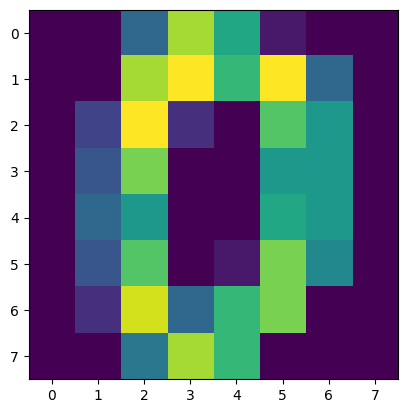

In [7]:
import matplotlib.pyplot as plt

plt.imshow(d.images[0])

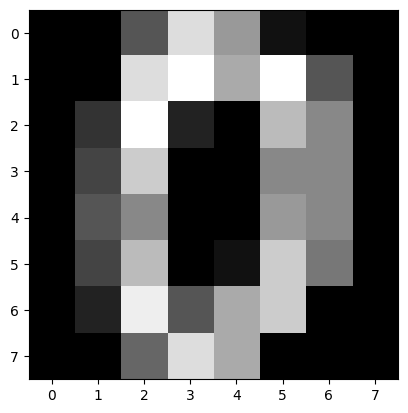

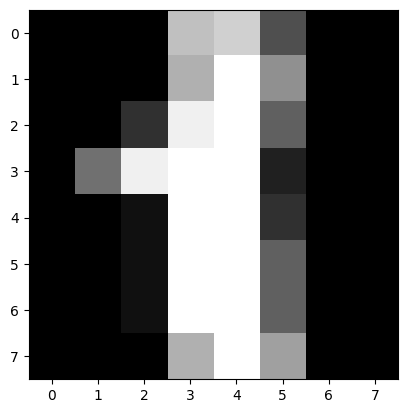

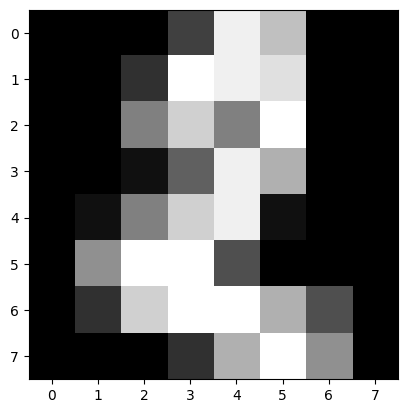

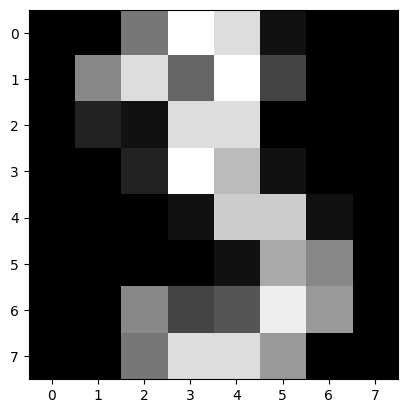

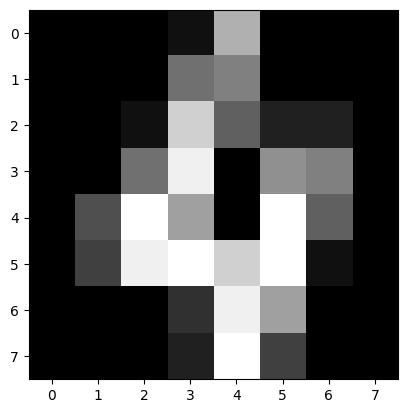

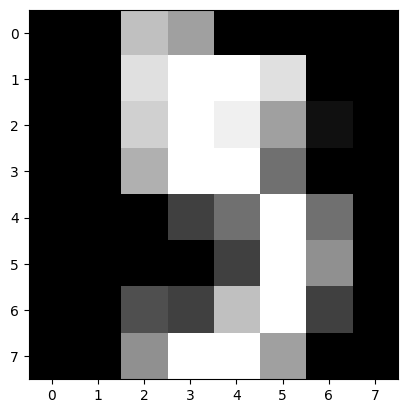

In [11]:
for i in range(6):
  plt.imshow(d.images[i])
  plt.gray()
  plt.show()

In [13]:
#lets form data
import pandas as pd
df = pd.DataFrame(d.data,columns=d.feature_names)
df.head(2)

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0


In [14]:
#check target
d.target

array([0, 1, 2, ..., 8, 9, 8])

In [15]:
import numpy as np
np.unique(d.target)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [17]:
len(d.target)

1797

In [18]:
df['output'] = d.target
df.head(2)

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,output
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1


In [19]:
#split the data using train_test_split
from sklearn.model_selection import train_test_split

In [20]:
X = df.drop(columns='output')
X[:2]

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0


In [21]:
y = df.output
y[:2]

0    0
1    1
Name: output, dtype: int64

In [22]:
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=.8)

In [23]:
from sklearn.naive_bayes import BernoulliNB

In [24]:
bnb = BernoulliNB()

In [25]:
bnb.fit(X_train,y_train)
bnb.score(X_train,y_train)*100

86.84759916492693

In [26]:
from sklearn.naive_bayes import MultinomialNB

In [27]:
mnb = MultinomialNB()
mnb.fit(X_train,y_train)
mnb.score(X_train,y_train)*100

90.46624913013221

In [30]:
from sklearn.naive_bayes import GaussianNB

In [32]:
gnb = GaussianNB()
gnb.fit(X_train,y_train)
gnb.score(X_train,y_train)*100

87.82185107863604

In [35]:
#test Phase
y_pred = mnb.predict(X_test)
y_pred[:5]

array([5, 2, 2, 7, 3])

In [36]:
y_test[:5]

1333    5
986     2
1547    2
746     4
1349    3
Name: output, dtype: int64

#Performance Metric

In [37]:
from sklearn.metrics import confusion_matrix,classification_report

In [38]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[34,  0,  0,  0,  1,  0,  0,  0,  0,  0],
       [ 0, 23,  2,  0,  0,  0,  0,  0,  2,  2],
       [ 0,  0, 31,  0,  0,  0,  0,  0,  2,  0],
       [ 0,  0,  2, 36,  0,  0,  0,  1,  0,  3],
       [ 0,  0,  0,  0, 28,  0,  0,  1,  0,  0],
       [ 0,  0,  0,  0,  1, 37,  0,  1,  1,  3],
       [ 0,  1,  0,  0,  0,  0, 34,  0,  0,  0],
       [ 0,  0,  0,  0,  1,  0,  0, 38,  0,  0],
       [ 0,  7,  0,  0,  0,  0,  0,  0, 30,  1],
       [ 0,  1,  0,  0,  0,  0,  0,  2,  0, 34]])

In [39]:
import seaborn as sns

Text(70.72222222222221, 0.5, 'Actual')

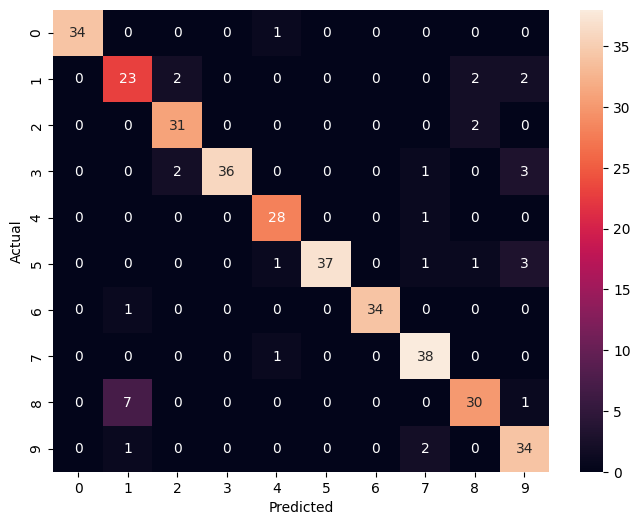

In [44]:
plt.figure(figsize=(8,6 ))
sns.heatmap(cm,annot=True)
plt.xlabel("Predicted")
plt.ylabel("Actual")
#columnwise predicted data
#rowwise aactual data

In [45]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.97      0.99        35
           1       0.72      0.79      0.75        29
           2       0.89      0.94      0.91        33
           3       1.00      0.86      0.92        42
           4       0.90      0.97      0.93        29
           5       1.00      0.86      0.92        43
           6       1.00      0.97      0.99        35
           7       0.88      0.97      0.93        39
           8       0.86      0.79      0.82        38
           9       0.79      0.92      0.85        37

    accuracy                           0.90       360
   macro avg       0.90      0.90      0.90       360
weighted avg       0.91      0.90      0.90       360

